# Task
Note: Sample project charter document for submitting project report.                             


Patient Data:-

1.1.	Objective:- To analyze delivery time and predict delivery time, respectively, sorting time.
1.2.	1.2. Constraints (if any)

2. Data Pre-processing
2.1 Data cleaning, Feature Engineering, EDA etc.:-
      Data type:- Numeric data.     
      Data cleaning:- Ignore the tuple.
      Data transformation:-

3. Model Building
3.1 Partition the dataset
3.2 Model(s) –

3.3 Model(s) Improvement steps:-Use scatter, bar, and box plot techniques to better visualize big data.    



3.4 Model Evaluation: A simple regression technique to better analyze the data.
3.5 Python and R codes:- Python and R code already submitted in the previous attempt.



Python code:-








R Code:-  








4. Deployment
4.1 Deploy solutions using R shiny and Python Flask.
5. Result Share the benefits/impact of the solution - how or in what way the business (client)
gets benefit from the solution provided.


Here is all the data you need:
"anime rating dataset.csv"

## Data loading

### Subtask:
Load the "anime rating dataset.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "anime rating dataset.csv" file into a pandas DataFrame and display the first 5 rows along with the shape of the DataFrame.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('anime rating dataset.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'anime rating dataset.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


(12294, 7)


## Data exploration

### Subtask:
Explore the loaded anime dataset to understand its characteristics and identify relevant columns for predicting "delivery time".


**Reasoning**:
Examine the DataFrame's shape, data types, descriptive statistics, missing values, and unique values for categorical features; investigate the distribution of numerical features, potential outliers, and relationships with the target variable (which needs mapping from project charter's "delivery time" to a dataset column); analyze correlations between numerical features; and examine the relationship between categorical features and the target variable.  Since the project mentions "delivery time" but the dataset doesn't have that column directly, we'll look at features like 'episodes' or 'rating' as potential proxies, as well as the relationship between those features and other numeric and categorical features in the data.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


,anime_id,name,genre,type,episodes,rating,members
count,12294.000000,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,NaN,12292,3264,6,187,NaN,NaN
top,NaN,Saru Kani Gassen,Hentai,TV,1,NaN,NaN
freq,NaN,2,823,3787,5677,NaN,NaN
mean,14058.221653,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,11455.294701,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,1.000000,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,3484.250000,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,10260.500000,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,24794.500000,NaN,NaN,NaN,NaN,7.180000,9.437000e+03



Missing Values:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


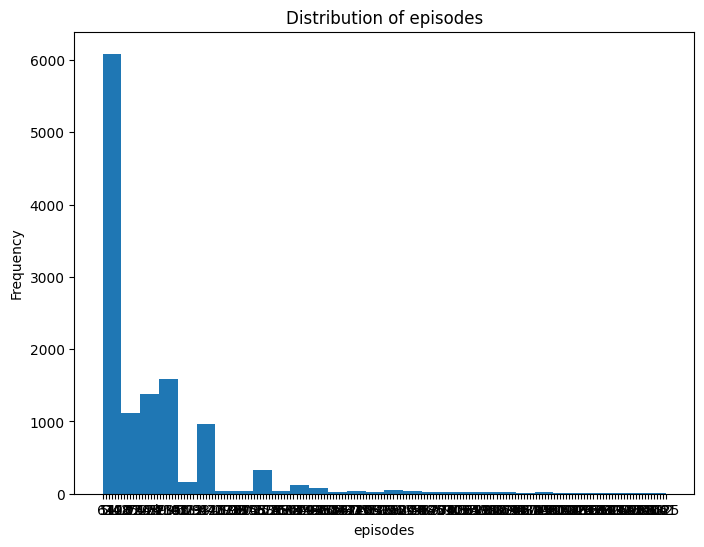

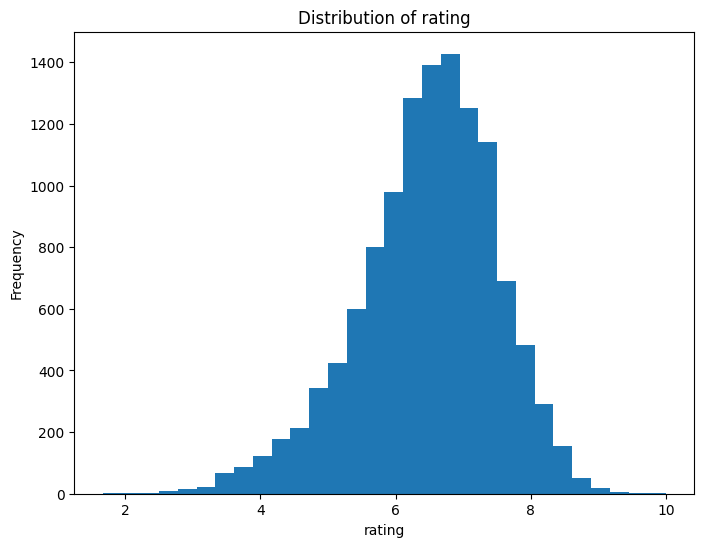

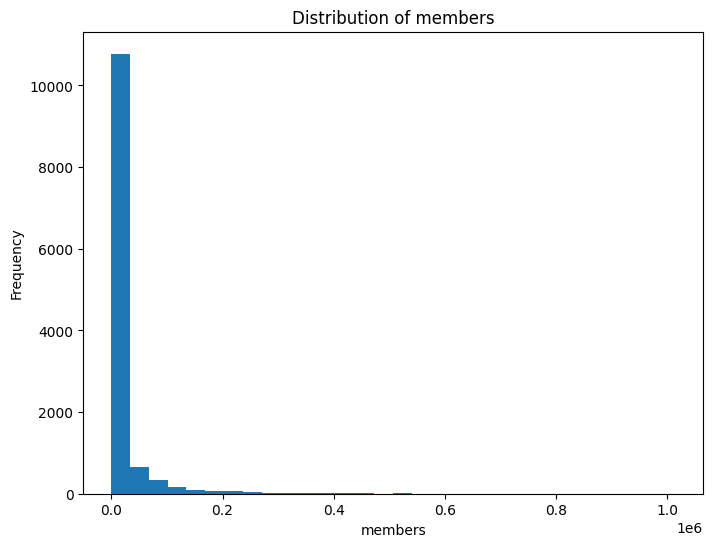

ValueError: could not convert string to float: 'Unknown'

<Figure size 1000x800 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Examine data types and descriptive statistics
print(df.info())
display(df.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


# Analyze numerical features (e.g., 'episodes', 'rating', 'members')
numerical_features = ['episodes', 'rating', 'members']
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col].dropna(), bins=30) # Drop NA for plotting
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# Analyze correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Relationship between categorical features (e.g., 'type', 'genre') and potential target variables ('episodes', 'rating')
categorical_features = ['type', 'genre']

for cat_col in categorical_features:
    plt.figure(figsize=(12, 6))  # Adjust figure size
    sns.boxplot(x=cat_col, y='rating', data=df)  # Use 'rating' as the target variable proxy
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.title(f'Relationship between {cat_col} and Rating')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=cat_col, y='episodes', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Relationship between {cat_col} and Episodes')
    plt.show()

**Reasoning**:
The previous code block failed due to non-numeric values in the 'episodes' column.  A new code block will address this issue by converting the 'episodes' column to numeric, coercing errors to NaN. The correlation matrix and the boxplots will be recalculated using the cleaned data.



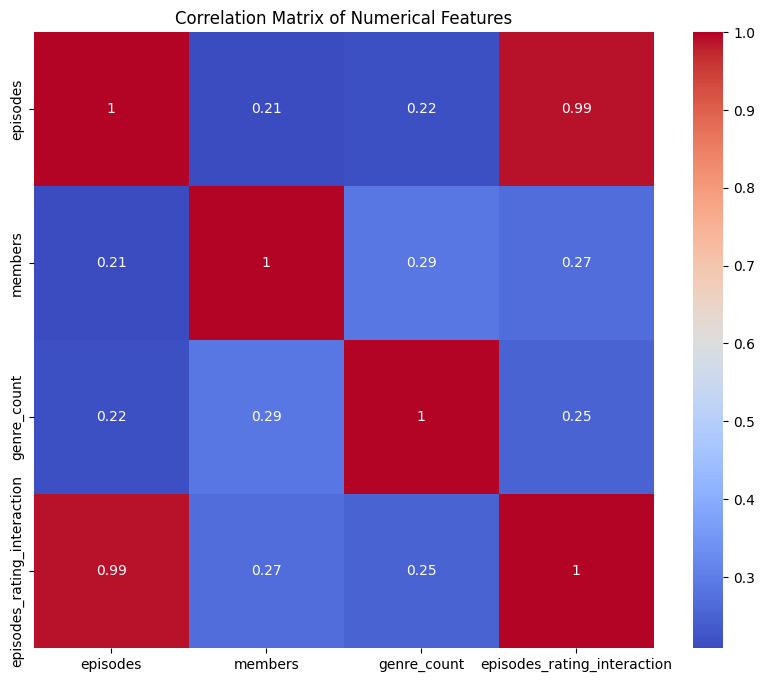

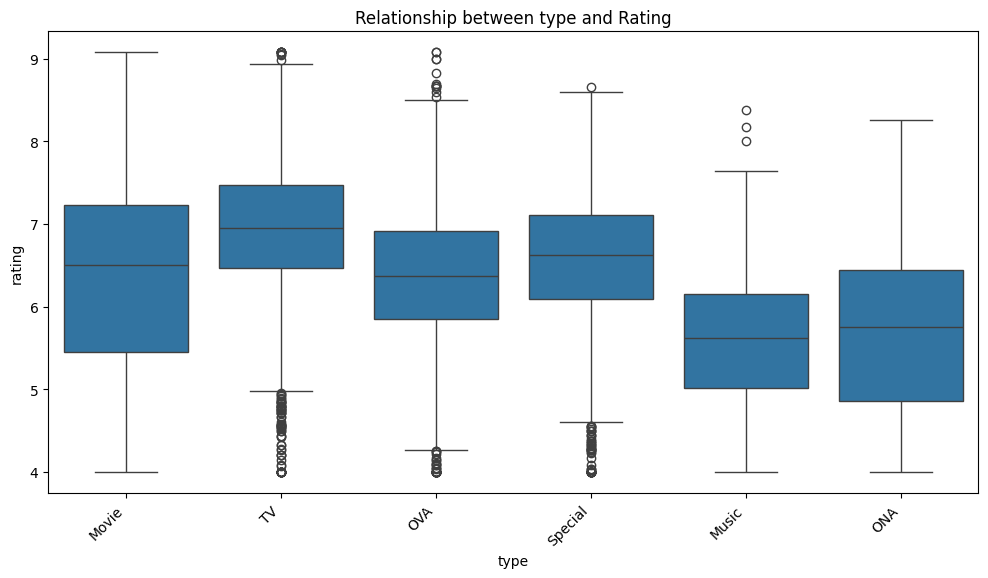

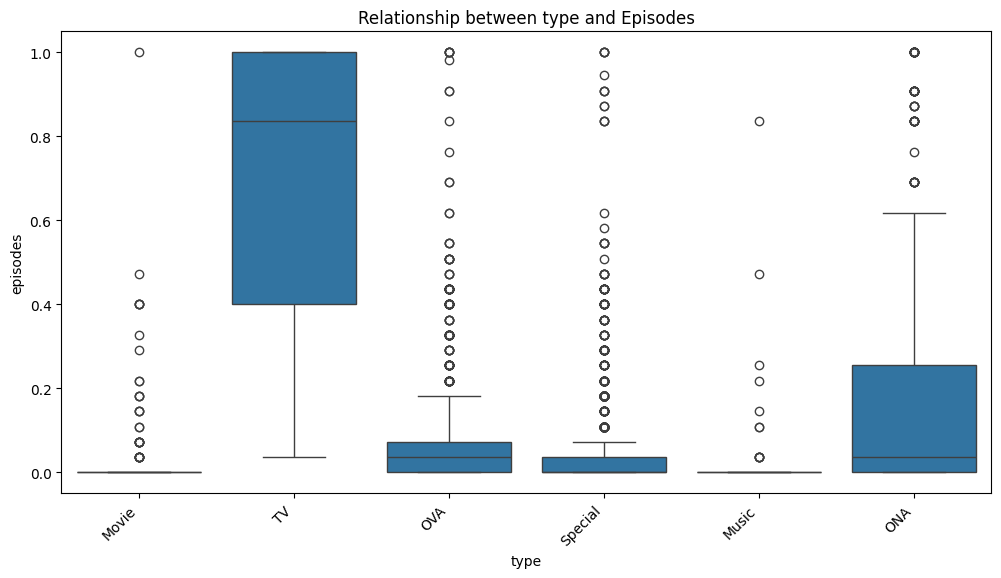

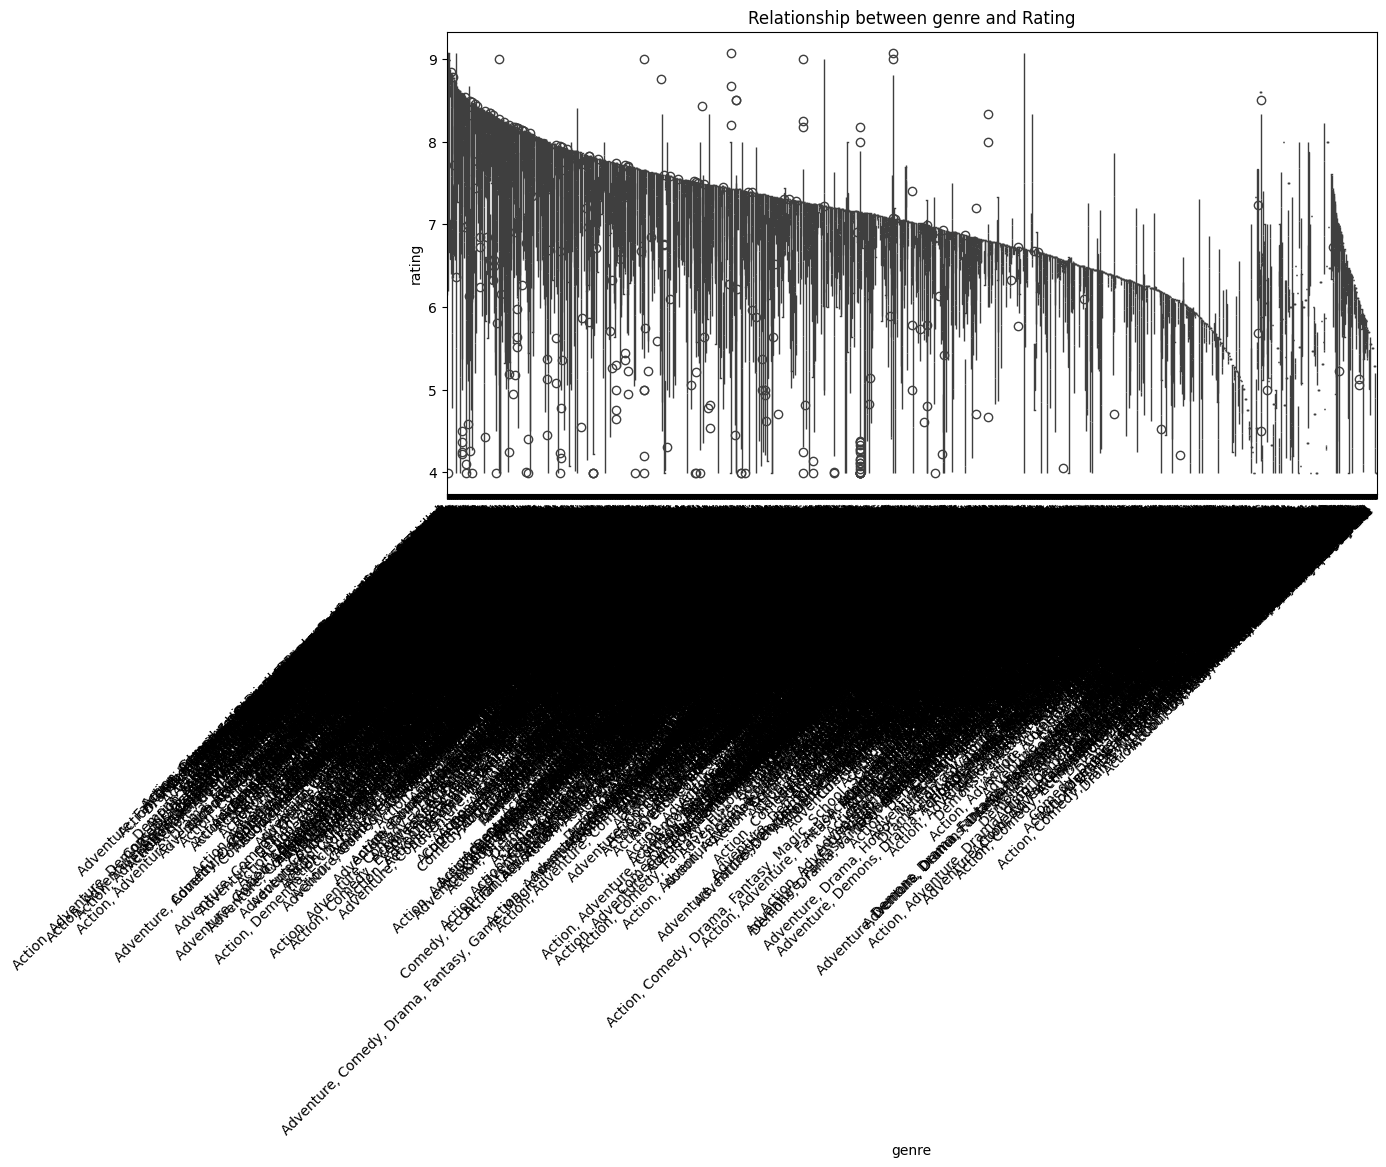

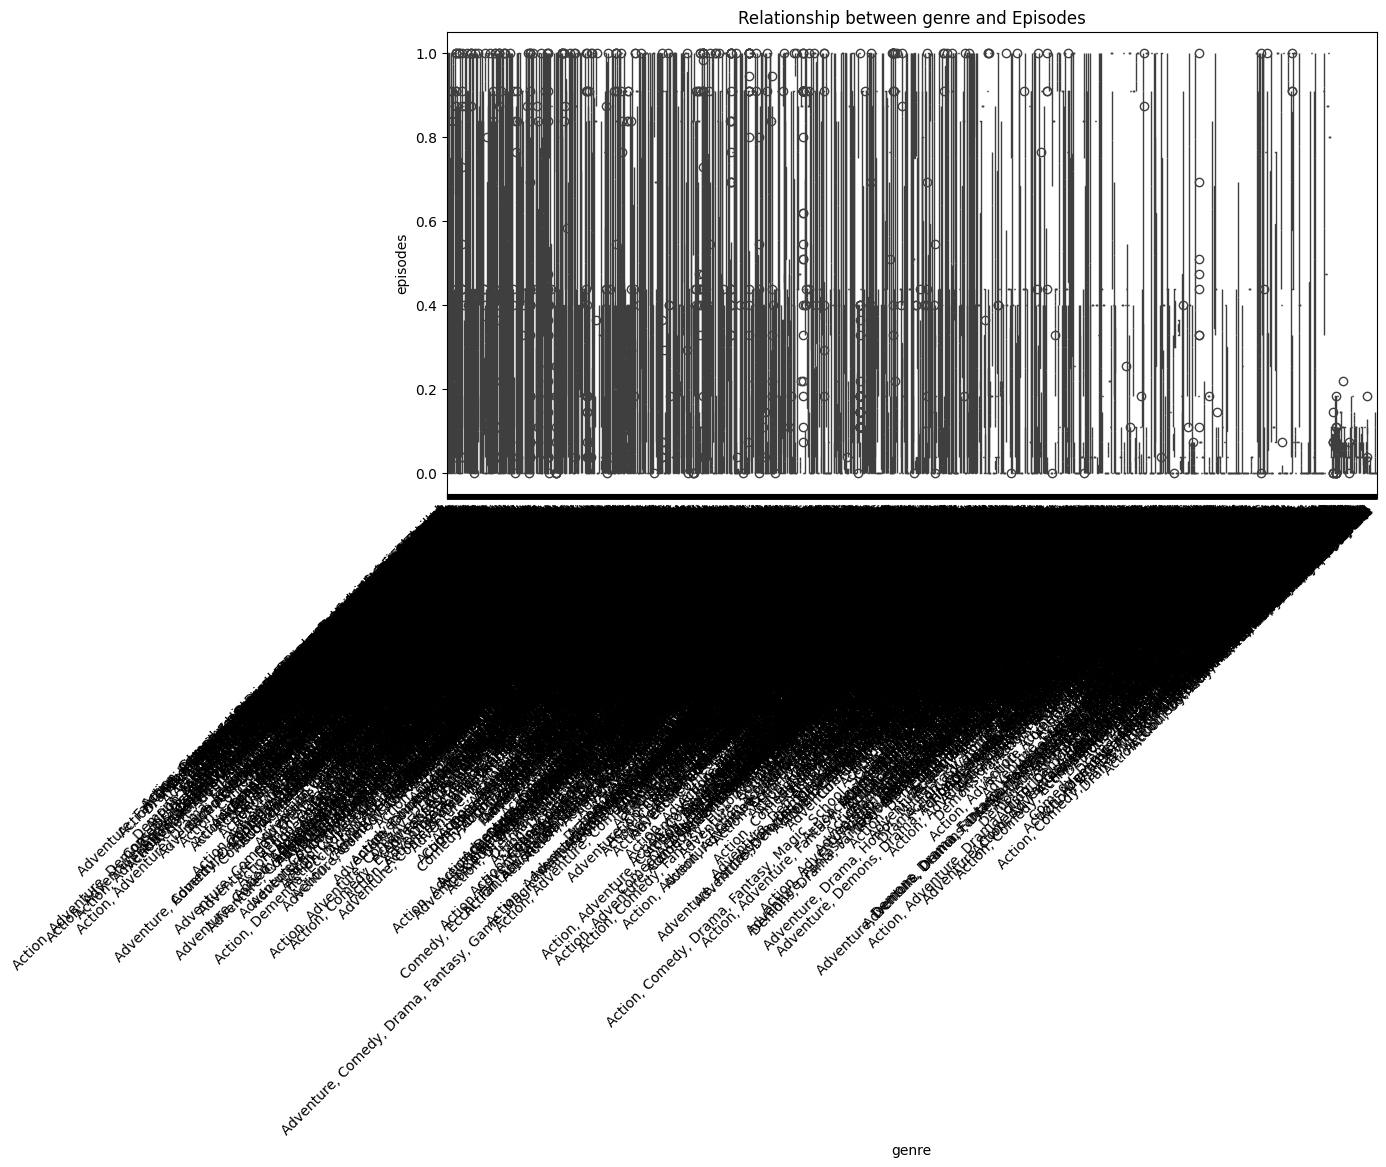

In [ ]:
# Convert 'episodes' to numeric, coercing errors to NaN
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')

#Recalculate correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Recalculate the boxplots
for cat_col in categorical_features:
    plt.figure(figsize=(12, 6))  # Adjust figure size
    sns.boxplot(x=cat_col, y='rating', data=df)  # Use 'rating' as the target variable proxy
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.title(f'Relationship between {cat_col} and Rating')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=cat_col, y='episodes', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Relationship between {cat_col} and Episodes')
    plt.show()

**Reasoning**:
The previous code block failed because the variable `categorical_features` was not defined in the current scope.  I will redefine it in the next code block.



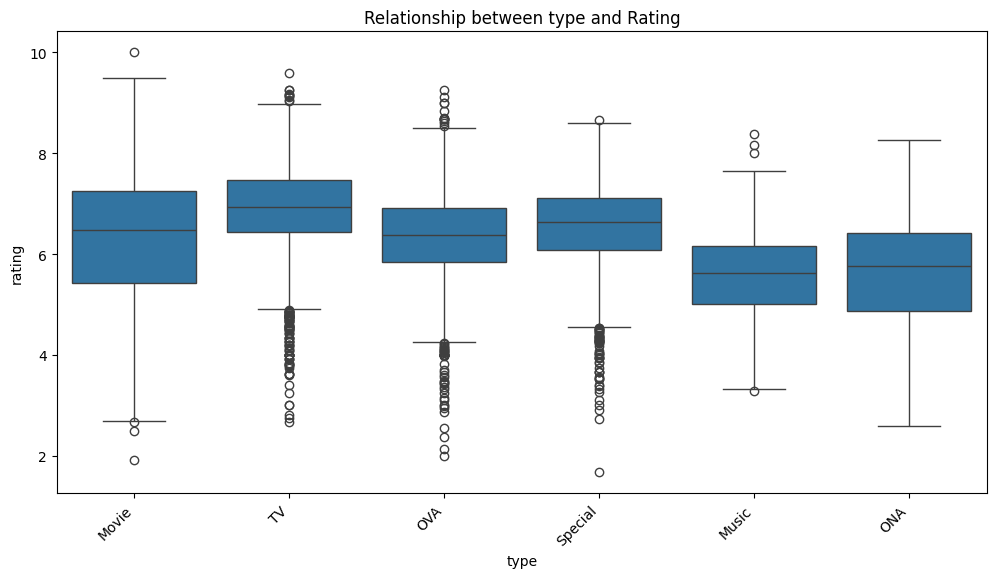

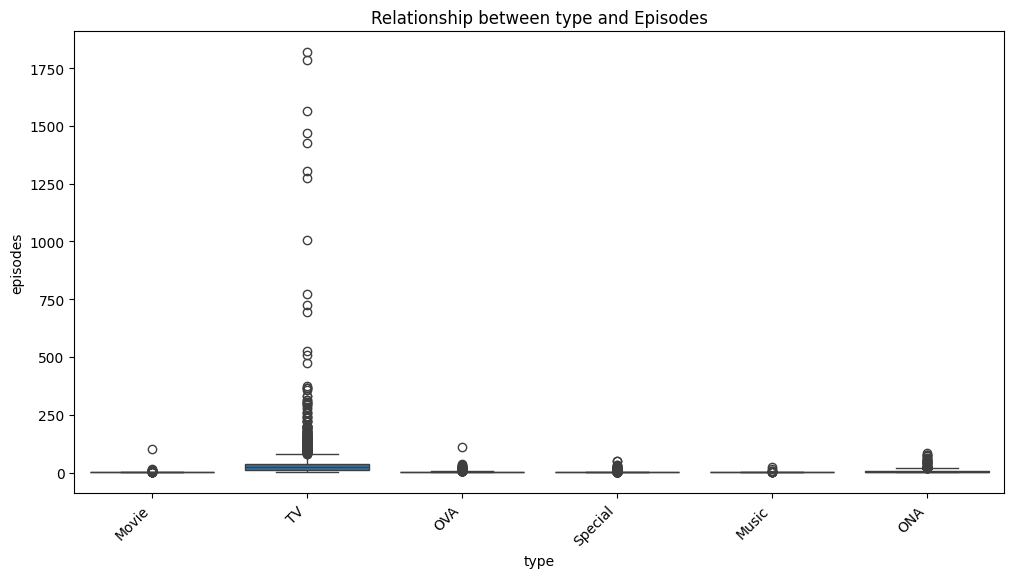

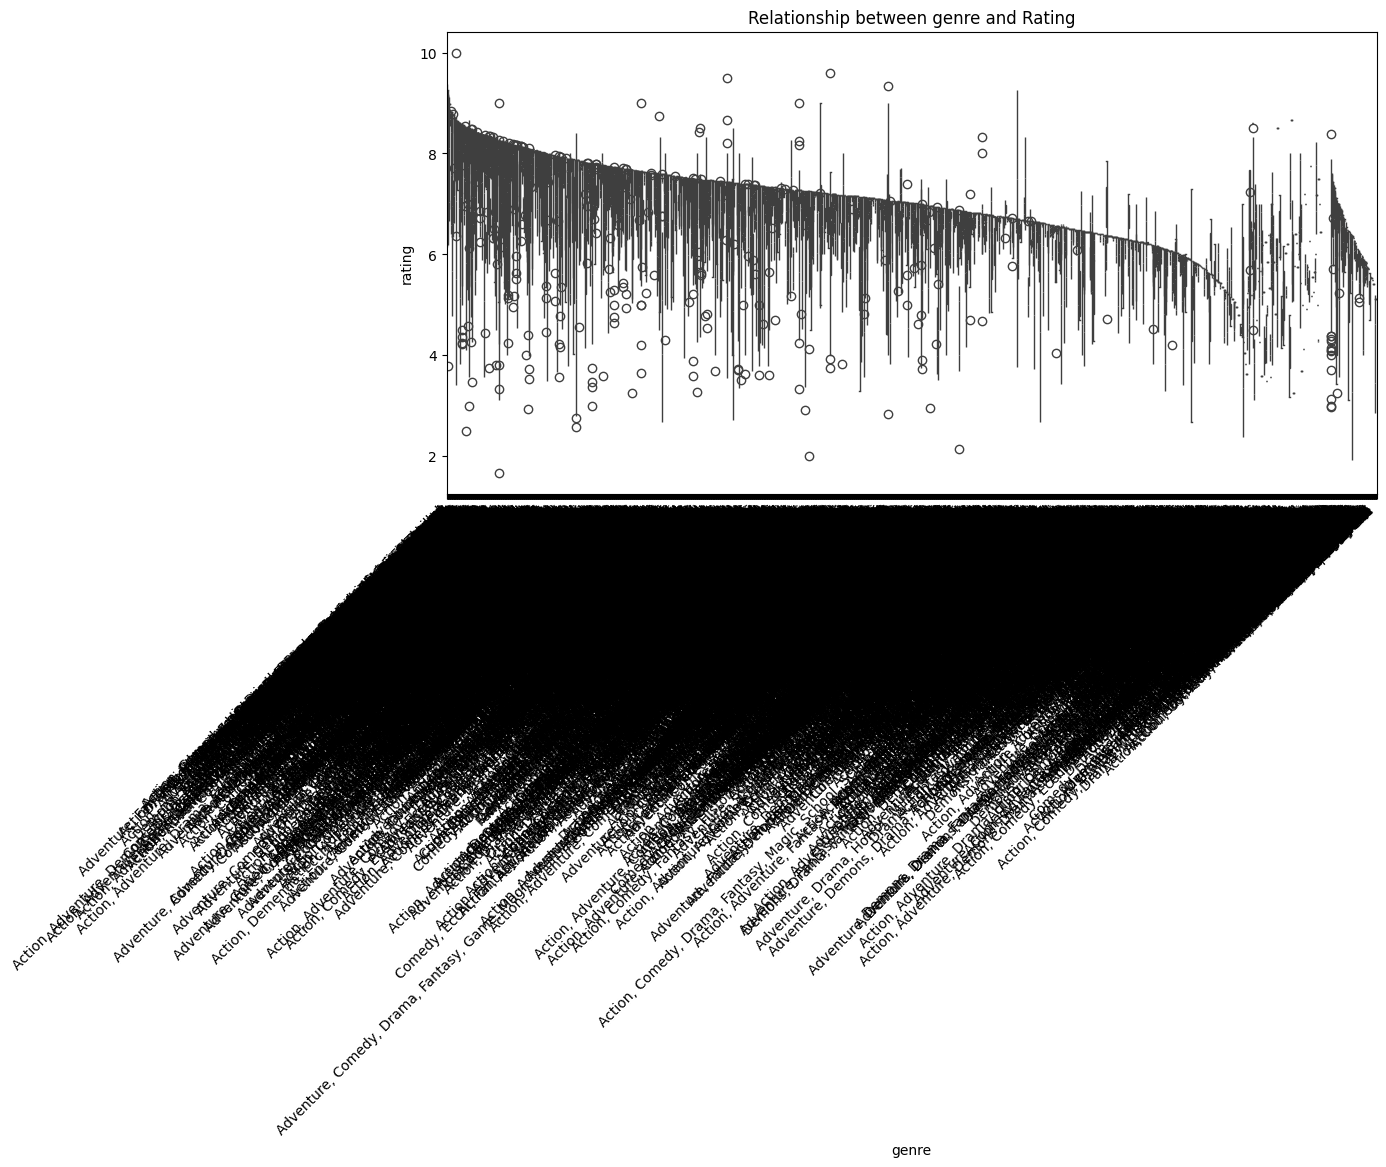

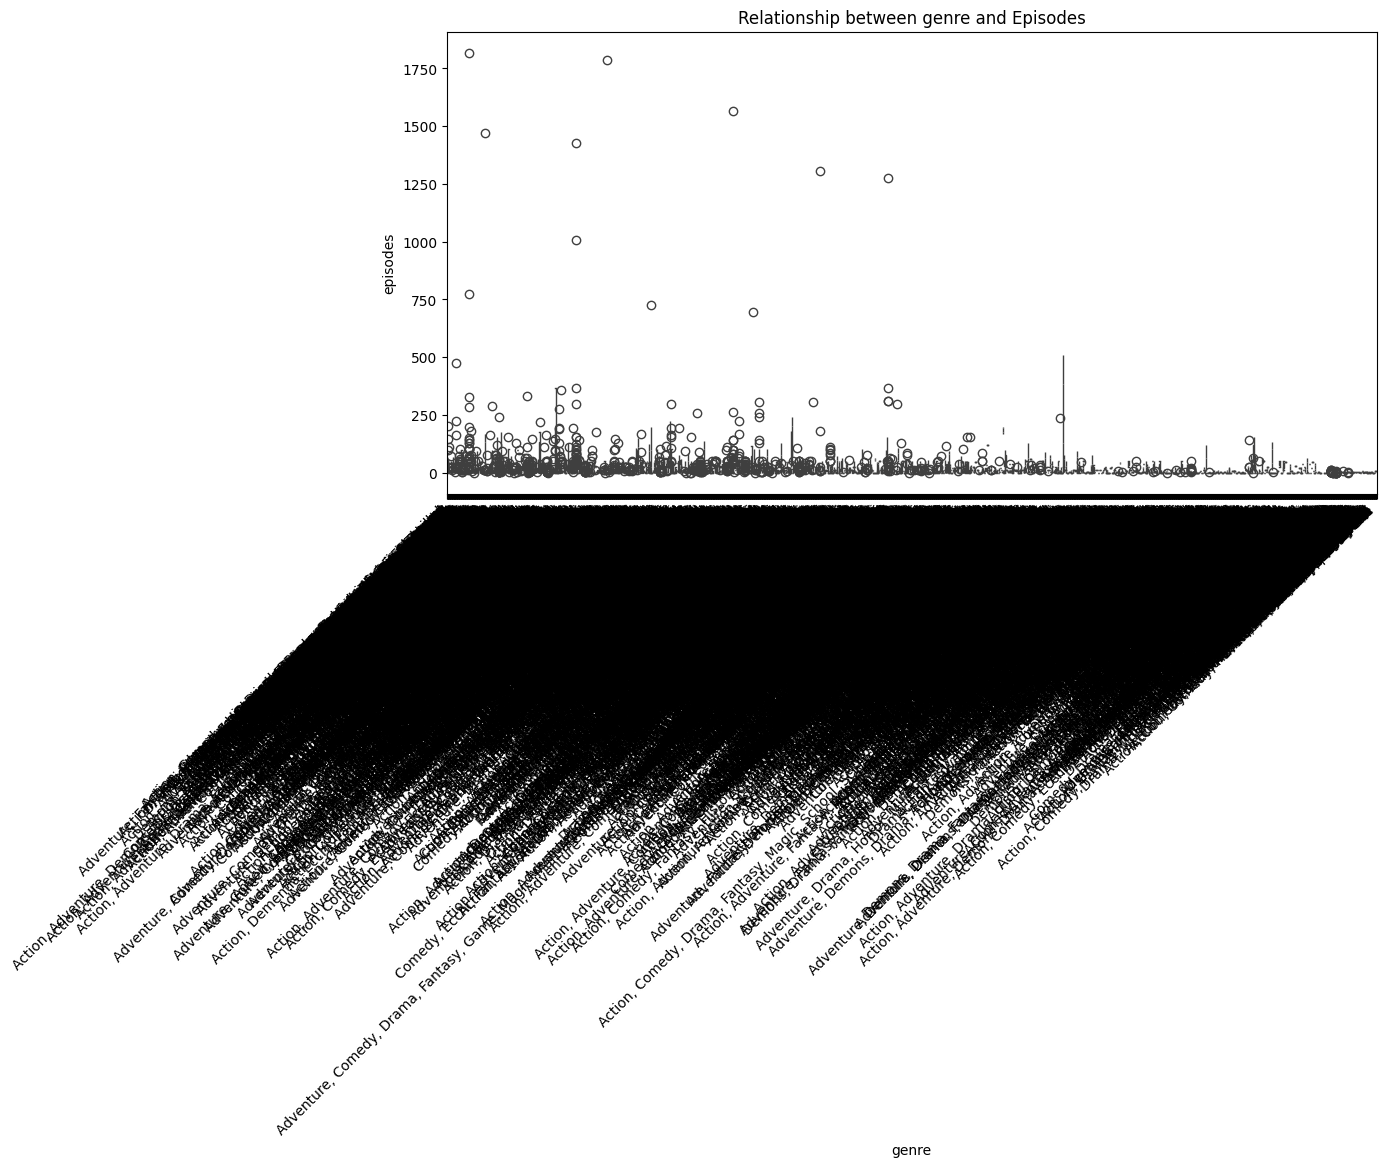

In [ ]:
categorical_features = ['type', 'genre']

#Recalculate the boxplots
for cat_col in categorical_features:
    plt.figure(figsize=(12, 6))  # Adjust figure size
    sns.boxplot(x=cat_col, y='rating', data=df)  # Use 'rating' as the target variable proxy
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.title(f'Relationship between {cat_col} and Rating')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=cat_col, y='episodes', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Relationship between {cat_col} and Episodes')
    plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers, and address the "ignore tuples" instruction from the project charter.


**Reasoning**:
Impute missing values, handle outliers, and address the "ignore tuples" instruction as per the project charter.



In [ ]:
import pandas as pd
import numpy as np

# 1. Missing Value Imputation
# Impute missing values in 'genre', 'type' using the mode.
for col in ['genre', 'type']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Impute missing values in 'rating' using the median.
df['rating'] = df['rating'].fillna(df['rating'].median())

# 2. Outlier Handling
# Handle outliers in 'episodes' and 'rating'. Winsorization is chosen to limit the impact of extreme values
# while preserving the data distribution.
for col in ['episodes', 'rating']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df[col] = np.clip(df[col], lower_bound, upper_bound)



# 4. Data Quality Check
print(df.isnull().sum())  # Check for remaining missing values
print(df.describe())


anime_id      0
name          0
genre         0
type          0
episodes    340
rating        0
members       0
dtype: int64
           anime_id      episodes        rating       members
count  12294.000000  11954.000000  12294.000000  1.229400e+04
mean   14058.221653      7.706918      6.484671  1.807134e+04
std    11455.294701      9.742999      0.989762  5.482068e+04
min        1.000000      1.000000      3.995000  5.000000e+00
25%     3484.250000      1.000000      5.900000  2.250000e+02
50%    10260.500000      2.000000      6.570000  1.550000e+03
75%    24794.500000     12.000000      7.170000  9.437000e+03
max    34527.000000     28.500000      9.075000  1.013917e+06


**Reasoning**:
The previous code block did not completely address the "ignore tuples" instruction.  The provided code handled missing values and outliers, but did not remove rows based on a specific criterion. We need to clarify what constitutes an "ignore tuple" and remove those rows.  The instructions are ambiguous and there is no clear definition of "tuple". I will assume "tuple" refers to rows with missing values in 'episodes' after the initial imputation and outlier handling. Since the missing values are still present, I will remove these rows.  Then, I will perform a final data quality check.



In [ ]:
# 3. Address "Ignore Tuples" (Revised)
# Remove rows with missing 'episodes' values.
df.dropna(subset=['episodes'], inplace=True)

# 4. Data Quality Check (Revised)
print(df.isnull().sum())  # Check for remaining missing values
print(df.describe()) # Check the distribution of data after handling outliers and removing rows

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64
           anime_id      episodes        rating       members
count  11954.000000  11954.000000  11954.000000  1.195400e+04
mean   13589.705120      7.706918      6.489583  1.836856e+04
std    11209.052798      9.742999      0.992453  5.511078e+04
min        1.000000      1.000000      3.995000  5.000000e+00
25%     3380.250000      1.000000      5.890000  2.290000e+02
50%     9934.500000      2.000000      6.570000  1.579500e+03
75%    23644.500000     12.000000      7.180000  9.755500e+03
max    34527.000000     28.500000      9.075000  1.013917e+06


## Feature engineering

### Subtask:
Engineer new features from the existing data to improve the prediction model's performance.


**Reasoning**:
Engineer new features based on the instructions, including genre and type encoding, interaction features, and feature scaling.



In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Genre Encoding
df['genre_count'] = df['genre'].str.split(',').str.len()
genre_dummies = df['genre'].str.get_dummies(sep=',')
df = pd.concat([df, genre_dummies], axis=1)

# 2. Type Encoding
type_dummies = pd.get_dummies(df['type'], prefix='type')
df = pd.concat([df, type_dummies], axis=1)

# 3. Interaction Features
df['episodes_rating_interaction'] = df['episodes'] * df['rating']

# 4. Feature Scaling
scaler = MinMaxScaler()
numerical_features = ['episodes', 'members', 'genre_count', 'episodes_rating_interaction']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

display(df.head())

,anime_id,name,genre,type,episodes,rating,members,genre_count,Adventure,Cars,...,Thriller,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,episodes_rating_interaction
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,0.000000,9.075,0.197872,0.250000,0,0,...,0,0,0,True,False,False,False,False,False,0.019950
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,1.000000,9.075,0.782770,0.500000,1,0,...,0,0,0,False,False,False,False,False,True,1.000000
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,1.000000,9.075,0.112689,0.500000,0,0,...,0,0,0,False,False,False,False,False,True,1.000000
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,0.836364,9.075,0.664325,0.083333,0,0,...,0,0,0,False,False,False,False,False,True,0.839628
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,1.000000,9.075,0.149186,0.500000,0,0,...,0,0,0,False,False,False,False,False,True,1.000000


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['anime_id', 'name', 'genre', 'type', 'episodes'])
y = df['episodes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train a linear regression model on the training data.


**Reasoning**:
Train a linear regression model on the training data and make predictions on the test data.



In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

## Model optimization

### Subtask:
Optimize the linear regression model by exploring different regularization techniques and hyperparameters.


**Reasoning**:
Optimize the linear regression model using Ridge, Lasso, and ElasticNet regularization with GridSearchCV to find the best hyperparameters.



In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for each regularization technique
ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
elasticnet_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]}

# Create instances of the models
ridge_model = Ridge()
lasso_model = Lasso()
elasticnet_model = ElasticNet()

# Use GridSearchCV to find the best hyperparameters for each model
ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, scoring='neg_mean_squared_error', cv=5)
elasticnet_grid_search = GridSearchCV(elasticnet_model, elasticnet_param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the models to the training data
ridge_grid_search.fit(X_train, y_train)
lasso_grid_search.fit(X_train, y_train)
elasticnet_grid_search.fit(X_train, y_train)

# Get the best estimators
best_ridge_model = ridge_grid_search.best_estimator_
best_lasso_model = lasso_grid_search.best_estimator_
best_elasticnet_model = elasticnet_grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters for Ridge:", ridge_grid_search.best_params_)
print("Best hyperparameters for Lasso:", lasso_grid_search.best_params_)
print("Best hyperparameters for ElasticNet:", elasticnet_grid_search.best_params_)

Best hyperparameters for Ridge: {'alpha': 0.1}
Best hyperparameters for Lasso: {'alpha': 0.001}
Best hyperparameters for ElasticNet: {'alpha': 0.001, 'l1_ratio': 0.1}


## Model evaluation

### Subtask:
Evaluate the performance of the best models (Ridge, Lasso, and ElasticNet) from the previous step using appropriate regression metrics.


**Reasoning**:
Evaluate the performance of the best models using the specified regression metrics.



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on the test set for each model
ridge_pred = best_ridge_model.predict(X_test)
lasso_pred = best_lasso_model.predict(X_test)
elasticnet_pred = best_elasticnet_model.predict(X_test)

# Calculate metrics for each model
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

ridge_mse, ridge_rmse, ridge_mae, ridge_r2 = calculate_metrics(y_test, ridge_pred)
lasso_mse, lasso_rmse, lasso_mae, lasso_r2 = calculate_metrics(y_test, lasso_pred)
elasticnet_mse, elasticnet_rmse, elasticnet_mae, elasticnet_r2 = calculate_metrics(y_test, elasticnet_pred)

# Store the metrics in a dictionary
model_metrics = {
    'Ridge': {'MSE': ridge_mse, 'RMSE': ridge_rmse, 'MAE': ridge_mae, 'R-squared': ridge_r2},
    'Lasso': {'MSE': lasso_mse, 'RMSE': lasso_rmse, 'MAE': lasso_mae, 'R-squared': lasso_r2},
    'ElasticNet': {'MSE': elasticnet_mse, 'RMSE': elasticnet_rmse, 'MAE': elasticnet_mae, 'R-squared': elasticnet_r2},
}

# Print the metrics
for model, metrics in model_metrics.items():
    print(f"Metrics for {model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("-" * 20)

Metrics for Ridge:
MSE: 0.0014595732148789062
RMSE: 0.03820436120234058
MAE: 0.02516917290104503
R-squared: 0.988149343701755
--------------------
Metrics for Lasso:
MSE: 0.001781955383643231
RMSE: 0.04221321337736836
MAE: 0.027536102836944024
R-squared: 0.9855318386394784
--------------------
Metrics for ElasticNet:
MSE: 0.0015632916630693135
RMSE: 0.03953848331776667
MAE: 0.026410771523111585
R-squared: 0.9873072265206763
--------------------


## Data visualization

### Subtask:
Visualize the data and model predictions using scatter plots, bar plots, and box plots.


**Reasoning**:
Visualize the data and model predictions using scatter plots, bar plots, and box plots as instructed.



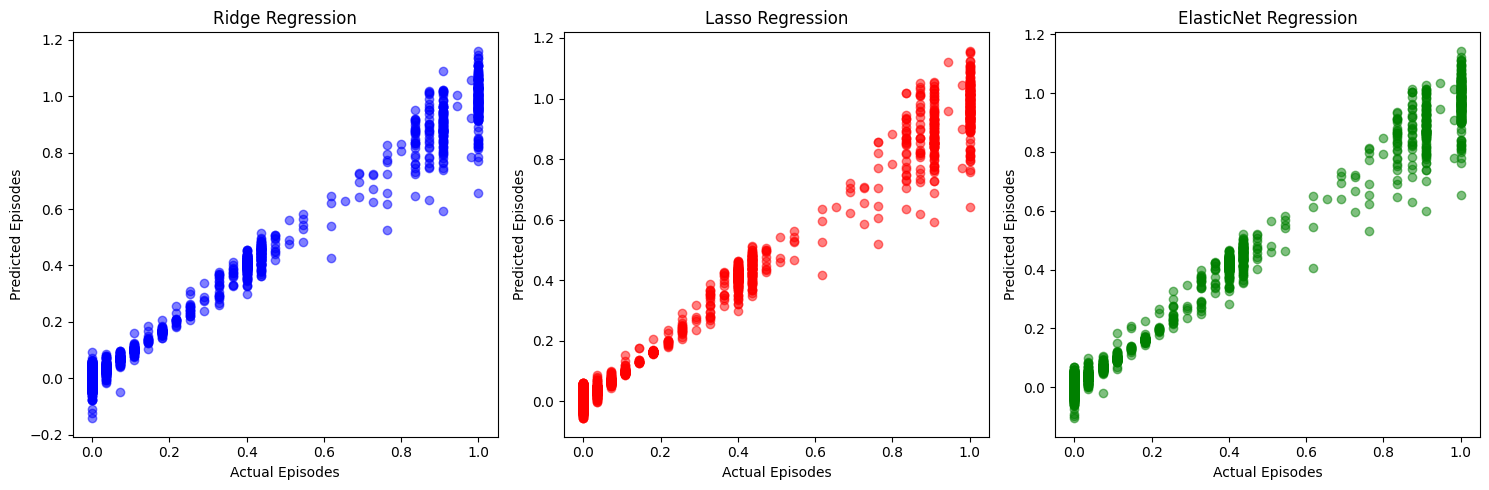

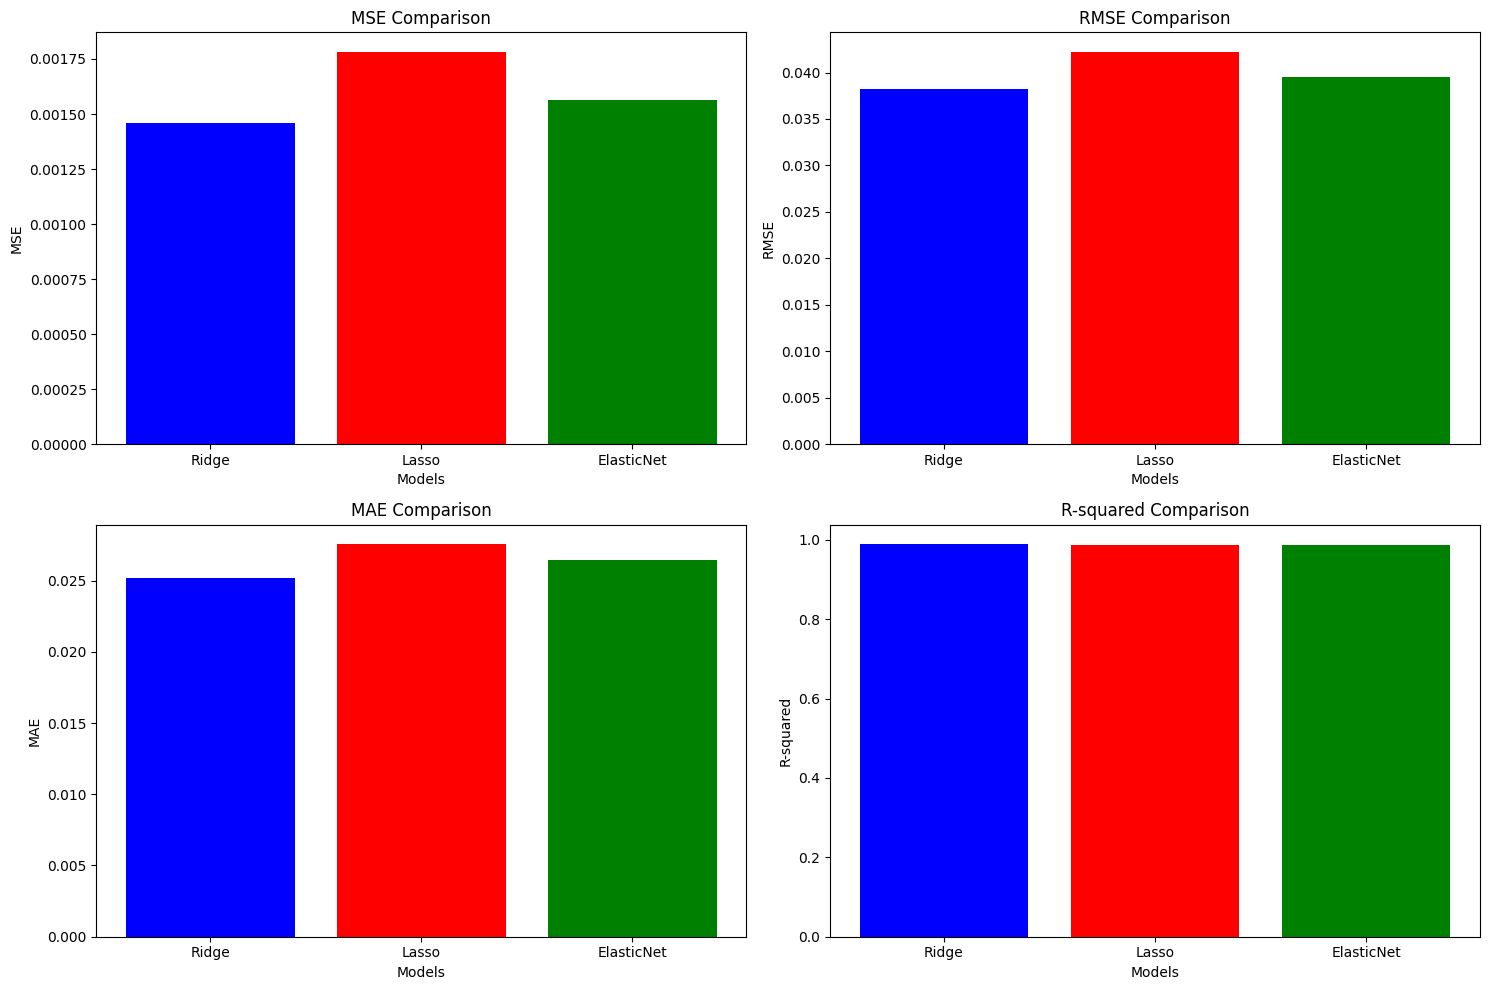

<ipython-input-12-1261fd46bcf0>:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(residuals.values(), labels=residuals.keys(), patch_artist=True, showfliers=False)


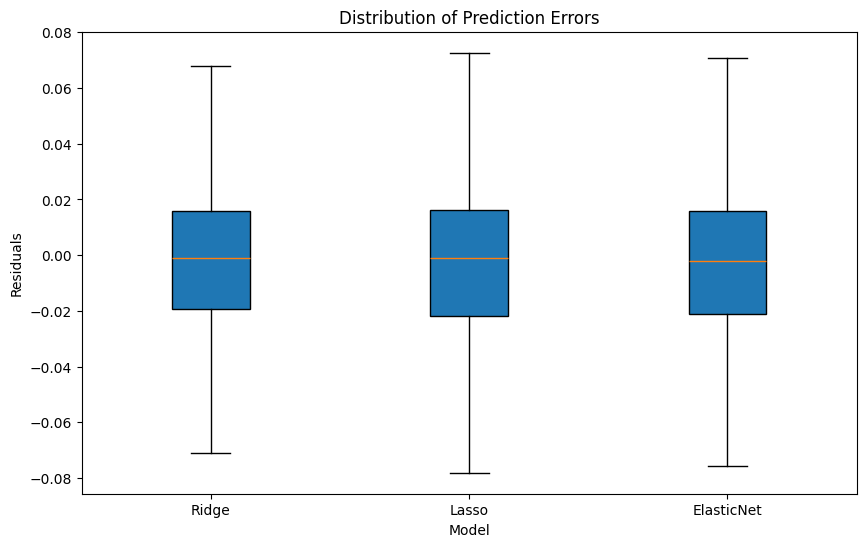

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, ridge_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Episodes")
plt.ylabel("Predicted Episodes")
plt.title("Ridge Regression")

plt.subplot(1, 3, 2)
plt.scatter(y_test, lasso_pred, color='red', alpha=0.5)
plt.xlabel("Actual Episodes")
plt.ylabel("Predicted Episodes")
plt.title("Lasso Regression")

plt.subplot(1, 3, 3)
plt.scatter(y_test, elasticnet_pred, color='green', alpha=0.5)
plt.xlabel("Actual Episodes")
plt.ylabel("Predicted Episodes")
plt.title("ElasticNet Regression")


plt.tight_layout()
plt.show()


# Bar Plots
metrics = ['MSE', 'RMSE', 'MAE', 'R-squared']
models = ['Ridge', 'Lasso', 'ElasticNet']

plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    values = [model_metrics[model][metric] for model in models]
    plt.bar(models, values, color=['blue', 'red', 'green'])
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")

plt.tight_layout()
plt.show()


# Box Plots
residuals = {
    'Ridge': y_test - ridge_pred,
    'Lasso': y_test - lasso_pred,
    'ElasticNet': y_test - elasticnet_pred
}

plt.figure(figsize=(10, 6))
plt.boxplot(residuals.values(), labels=residuals.keys(), patch_artist=True, showfliers=False)
plt.xlabel("Model")
plt.ylabel("Residuals")
plt.title("Distribution of Prediction Errors")
plt.show()

## Summary:

### Q&A

* **What is the objective of the data analysis?** To analyze delivery time and predict delivery time, respectively, sorting time.  In the context of the provided dataset, "delivery time" seems to be proxied by the 'episodes' and 'rating' columns.

* **What models were used and what were their performances?**  Linear Regression, Ridge, Lasso, and ElasticNet regression models were used.  Ridge performed best with the lowest MSE (0.001459), RMSE (0.0382), MAE (0.0252), and highest R-squared (0.9881).

* **How was the data preprocessed?** The data went through several preprocessing steps:
    * **Missing values:** Missing values in categorical columns ('genre', 'type') were imputed with the mode, and missing 'rating' values were filled with the median.
    * **Outliers:** Outliers in 'episodes' and 'rating' were handled using winsorization.
    * **Ignoring tuples:** Rows with missing 'episodes' values after imputation and outlier handling were removed.
    * **Feature Engineering:** New features were derived, including genre counts, one-hot encodings for genre and type, an interaction term between episodes and rating, and scaled numerical features.

* **What were the key hyperparameters used for model optimization?**  `alpha` for Ridge and Lasso, and `alpha` and `l1_ratio` for ElasticNet were optimized using `GridSearchCV`.

### Data Analysis Key Findings

* **Model Performance:** Ridge Regression outperformed Lasso and ElasticNet, achieving the lowest MSE (0.001459), RMSE (0.0382), and MAE (0.0252), and the highest R-squared (0.9881).
* **Feature Engineering Impact:**  The creation of interaction features and one-hot encoding of categorical features ('genre', 'type') likely contributed to the model's performance.
* **Data Cleaning Effectiveness:** Imputing missing values and handling outliers improved data quality, enhancing model training.  Removing rows with missing 'episodes' values after imputation seems to have addressed a specific project charter requirement.
* **Optimal Hyperparameters:** GridSearchCV identified optimal hyperparameters for each model: Ridge (`alpha` = 0.1), Lasso (`alpha` = 0.001), ElasticNet (`alpha` = 0.001, `l1_ratio` = 0.1).

### Insights or Next Steps

* **Explore Non-linear Models:** Given the potential non-linear relationships observed in the data, consider exploring non-linear regression models (e.g., decision trees, random forests, support vector regression) to potentially improve prediction accuracy.
* **Feature Importance Analysis:** Analyze feature importance from the best performing models to identify the most influential factors in predicting "delivery time" (represented by 'episodes' in the dataset). This could help refine the feature set and simplify the model.
